In [ ]:
# default_exp learner

In [ ]:
import nbdev.showdoc as literacy

In [ ]:
#export
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *

# Learner

## Prep

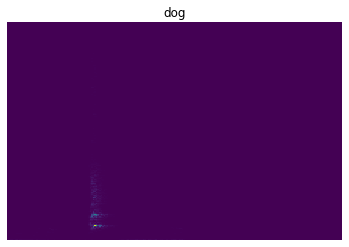

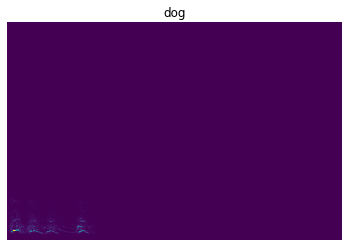

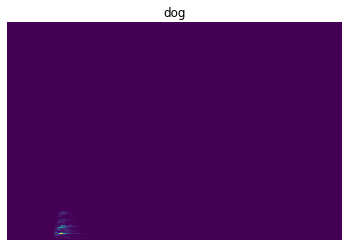

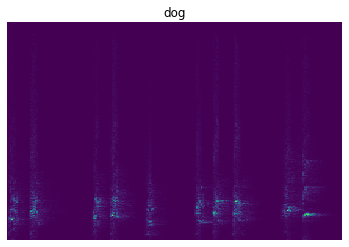

In [ ]:
data = DataBlock(blocks=(AudioBlock(), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label)

fn = Path("../data/SmallDataset/")
dbunch = data.databunch(fn, item_tfms=(Resample(22050), Clip(5), Spectify(), PhaseManager()), bs=4)

dbunch.show_batch()

In [ ]:
from torch.nn import Sequential, Conv2d, ReLU, BatchNorm2d, MaxPool2d, Linear
from fastai2.learner import Learner
from fastai2.metrics import accuracy

## Model Audio

In [ ]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(2, 4, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(54272, 2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

spec_model = Net()

In [ ]:
learner = Learner(dbunch, spec_model, metrics=error_rate)

In [ ]:
learner.fit_one_cycle(4)